In [ ]:
# Import necessary libraries and set random seed for reproducibility

import numpy as np               # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns            # Seaborn for data visualization
import cv2                       # OpenCV for image processing
from PIL import Image            # Python Imaging Library for image handling
import tensorflow as tf          # TensorFlow for deep learning
tf.random.set_seed(3)            # Set a random seed for reproducible results
from tensorflow import keras     # Keras, a high-level deep learning API
from keras.datasets import mnist # MNIST dataset for digit classification
from tensorflow.math import confusion_matrix  # TensorFlow math for confusion matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

Loading the MNIST data from keras.datasets

In [2]:
# Load the MNIST dataset, which consists of handwritten digit images
# The dataset is divided into two parts: training and testing data
# (x_train, y_train): Training data, where x_train contains the images and y_train contains their corresponding labels
# (x_test, y_test): Testing data, used to evaluate the model's performance
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
# Print the data types of x_train
type(x_train)

numpy.ndarray

In [4]:
# Print the shapes of the datasets
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 Images , Test data = 10000 Images

Image dimension --> 28 x 28
Grayscale Image --> 1 Channel

In [5]:
# Print the data of a specific image (in this case, the 10th image in the training set)

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
# Print the shape of a specific image
print(x_train[10].shape)

(28, 28)


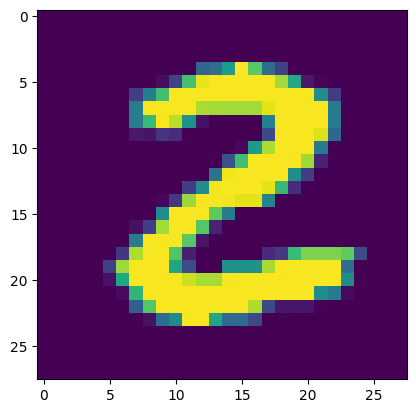

Image Labels: 2


In [7]:
# Display an image (in this case, the 25th image in the training set)
plt.imshow(x_train[25])
plt.show()

# Print the label corresponding to the displayed image
print('Image Labels:', y_train[25])

In [8]:
# Print the shapes of the training and testing label sets
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
# Print unique values in y_train
print('Unique values in y_train:', np.unique(y_train))

# Print unique values in y_test
print('Unique values in y_test:', np.unique(y_test))

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]


we can these labels as such or we can also apply One Hot Encoding

All the images have the same dimension in this datasets , if not , we have 
to resize all the Images to a common dimension

In [10]:
# Scale the pixel values to a range between 0 and 1 (Normalization)
x_train = x_train / 255
x_test = x_test / 255

In [11]:
# Print the normalized pixel values of a specific image (in this case, the 10th image)
print('Normalized Pixel Values of the 10th Image:', x_train[10])

Normalized Pixel Values of the 10th Image: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0

In [12]:
# Create a sequential model
model = keras.Sequential()

# Flatten the input data (convert 28x28 images to a 1D array of 784 elements)
model.add(Flatten(input_shape=(28, 28)))

# Add a densely connected layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add another densely connected layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# Add the output layer with 10 units (for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

In [13]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the neural network
model.compile(
    optimizer='adam',                  # Specify the optimization algorithm (Adam optimizer is commonly used)
    loss='sparse_categorical_crossentropy',  # Specify the loss function (used for training, suitable for classification)
    metrics=['accuracy']               # Specify evaluation metrics (accuracy will be calculated during training)
)


In [ ]:
# Train the model on the training data (x_train and y_train) for 25 epochs with a 20% validation split
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2874 - accuracy: 0.9165 - val_loss: 0.1704 - val_accuracy: 0.9499
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1213 - accuracy: 0.9632 - val_loss: 0.1189 - val_accuracy: 0.9638
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0823 - accuracy: 0.9747 - val_loss: 0.1001 - val_accuracy: 0.9707
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0985 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.1060 - val_accuracy: 0.9702
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.1026 - val_accuracy: 0.9732
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.1083 - val_accuracy:

In [ ]:
# Save the trained Keras model to a file named 'keras_model.h5'
#model.save('keras_model.h52')

Training data Accuracy = 98.7%

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

# Print the accuracy of the model on the test data
print(accuracy)

Test data Accuracy = 97.7%

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])         # Plot the training loss for each epoch
plt.plot(history.history['val_loss'])     # Plot the validation loss for each epoch
plt.xlabel('Epoch')                       # Label the x-axis as 'Epoch'
plt.ylabel('Loss')                        # Label the y-axis as 'Loss'
plt.legend(['Training Loss', 'Validation Loss'])  # Add a legend to the plot to distinguish between training and validation loss
plt.show()                                # Display the plot


In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot the training accuracy for each epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot the validation accuracy for each epoch
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Accuracy')  # Label the y-axis as 'Accuracy'
plt.legend()  # Add a legend to the plot to distinguish between training and validation accuracy
plt.show()  # Display the plot


In [ ]:
# Print the shape of the test data (x_test)
print(x_test.shape)

In [ ]:
# Display the first image in the test data
plt.imshow(x_test[0])
plt.show()

In [ ]:
# Print the true label of the first image in the test data
print(y_test[0])

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(x_test)

In [ ]:
# Print the predicted probabilities for the first image
print(y_pred[0])

Model.predict() gives the prediction probability of each class for that data point

In [ ]:
# Convert the prediction probability to a class label for the first image
label_for_first_time_image = np.argmax(y_pred[0])
print(label_for_first_time_image)

In [ ]:
# Convert the predicted probabilities for all test images to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]

# Print the class labels for all test images
print(y_pred_labels)

Y_test --> True Labels  ,  Y_pred_labels --> Predicted Labels

# Confusion Matrix

In [ ]:
# Create a confusion matrix to evaluate model performance
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf_mat)

In [ ]:
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(15, 7))  # Set the figure size to 15 inches in width and 7 inches in height

# Generate a heatmap of the confusion matrix with annotations, using a blue color map ('Blues')
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

plt.ylabel('True Labels')  # Label the y-axis as 'True Labels'
plt.xlabel('Predicted Labels')  # Label the x-axis as 'Predicted Labels'

# Display the heatmap
plt.show()


# Predictive System

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ask the user for the path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Load the input image using OpenCV
input_image = cv2.imread(input_image_path)

# Use matplotlib to display the input image
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))  # Display the image in RGB format
plt.axis('off')  # Hide axes
plt.show()

# Convert the input image to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# Resize the grayscale image to the same dimensions as the model input (28x28 pixels)
input_image_resize = cv2.resize(grayscale, (28, 28))

# Normalize pixel values to the range [0, 1]
input_image_resize = input_image_resize / 255

# Reshape the image to match the model's input shape (1, 28, 28)
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

# Use the trained model to make a prediction on the input image
input_prediction = model.predict(image_reshaped)

# Find the predicted label (the digit recognized from the input image)
input_pred_label = np.argmax(input_prediction)

# Print the recognized digit label
print('The Handwritten Digit is recognized as :-', input_pred_label)
